In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
jul= pd.read_excel('/content/drive/MyDrive/projet 2 /jul-22.xlsx')

In [ ]:
jul.head()

,co_id,activation_date,total_nb_recharge,total_rechage,total_u_data,total_rev_option,total_rev_sos,total_u_out,total_u_in,usage_op1,...,usage_op3,nb_cont_out,nb_cont_in,nb_cell_visite_out,nb_cell_visite_in,entity_code,entity_type_name,nbr_contrat,nbr_actif,flag_churn
0,36799963,2022-07-20 19:45:16,2.0,1.878,1.089560e+07,0.756302,NaN,14.950,0.633,NaN,...,1.250,10.0,4.0,6.0,5.0,TRA016,AGENCE TRADE,13.0,3.0,0
1,36800104,2022-07-20 10:39:24,1.0,0.878,9.520800e+06,NaN,NaN,14.983,17.617,NaN,...,13.383,12.0,13.0,4.0,10.0,TRA016,AGENCE TRADE,23.0,5.0,1
2,34763697,2022-07-06 13:27:15,25.0,28.386,8.024546e+06,11.428571,NaN,240.100,86.034,NaN,...,26.900,69.0,56.0,22.0,28.0,TRA065,AGENCE TRADE,24.0,7.0,0
3,36822172,2022-07-17 11:47:54,1.0,0.878,6.366023e+06,NaN,NaN,13.083,4.183,NaN,...,NaN,5.0,5.0,4.0,6.0,TRA035,AGENCE TRADE,56.0,6.0,0
4,34745291,2022-07-04 11:13:53,1.0,4.386,2.587891e-01,NaN,NaN,1.967,5.784,NaN,...,NaN,2.0,11.0,1.0,7.0,TUN0331,AGENCE TRADE,2.0,0.0,0


In [ ]:
# Conversion de la colonne date en datetime
jul['activation_date'] = pd.to_datetime(jul['activation_date'])

# Tri des données par date
jul = jul.sort_values(by='activation_date')

In [ ]:
  print(jul.activation_date.dtypes)

datetime64[ns]


In [ ]:
print(jul.isna().mean() * 100)


co_id                  0.000000
activation_date        0.000000
total_nb_recharge     10.777698
total_rechage         10.777698
total_u_data          17.719768
total_rev_option      40.835883
total_rev_sos         99.847415
total_u_out            7.547913
total_u_in            29.886105
usage_op1             99.464264
usage_op2             92.549187
usage_op3             40.515341
nb_cont_out            8.003794
nb_cont_in             4.975331
nb_cell_visite_out     8.003794
nb_cell_visite_in      4.975331
entity_code            3.083198
entity_type_name       3.083198
nbr_contrat            2.792274
nbr_actif              2.792274
flag_churn             0.000000
dtype: float64


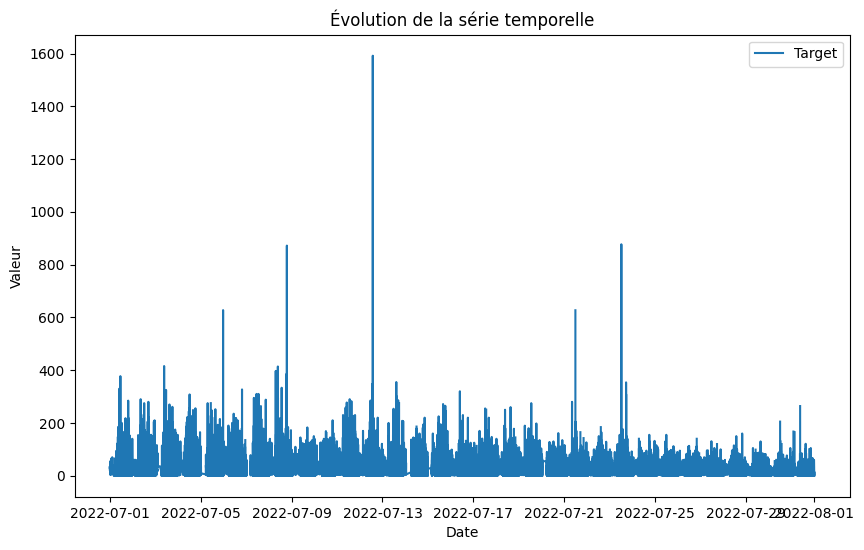

In [ ]:
import matplotlib.pyplot as plt

# Visualisation de la cible
plt.figure(figsize=(10, 6))
plt.plot(jul['activation_date'], jul['total_rechage'], label='Target')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Évolution de la série temporelle')
plt.legend()
plt.show()


In [ ]:
df1= jul[['activation_date','total_rechage']]
df1

,activation_date,total_rechage
86475,2022-07-01 00:02:37,NaN
59155,2022-07-01 00:02:41,NaN
51830,2022-07-01 00:04:07,NaN
104400,2022-07-01 00:04:41,30.0
264513,2022-07-01 00:04:50,35.0
...,...,...
14865,2022-07-31 23:56:50,0.0
149016,2022-07-31 23:57:34,0.0
71657,2022-07-31 23:57:44,0.0
71147,2022-07-31 23:57:58,0.0


In [ ]:
# Regrouper les données par heure et sommer les valeurs de total_recharge
df_hourly = df1.resample('H', on='activation_date')['total_rechage'].sum().reset_index()

# Renommer les colonnes pour clarté
df_hourly.columns = ['date_hour', 'total_rechage']


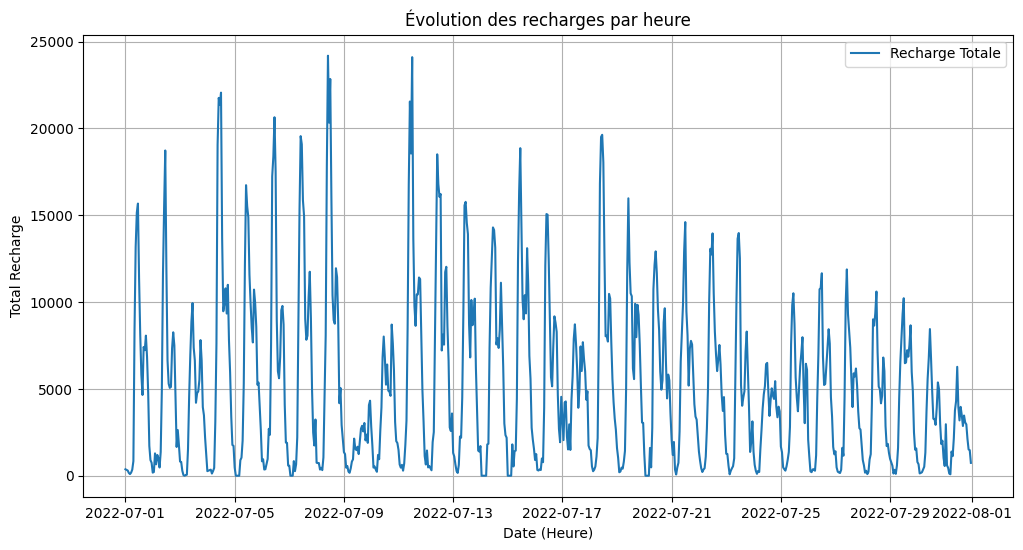

In [ ]:
import matplotlib.pyplot as plt

# Visualisation de la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(df_hourly['date_hour'], df_hourly['total_rechage'], label='Recharge Totale')
plt.xlabel('Date (Heure)')
plt.ylabel('Total Recharge')
plt.title('Évolution des recharges par heure')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


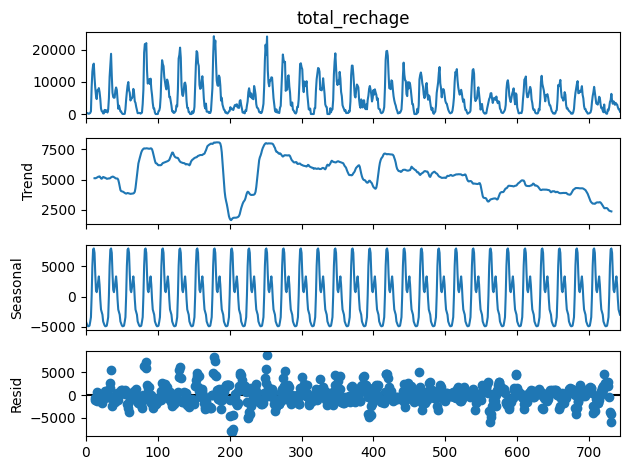

In [ ]:
# Perform seasonal decomposition (additive model)
decompose_result = seasonal_decompose(df_hourly['total_rechage'], model='additive', period=24)

# Plot the decomposed components
decompose_result.plot()
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from random import random

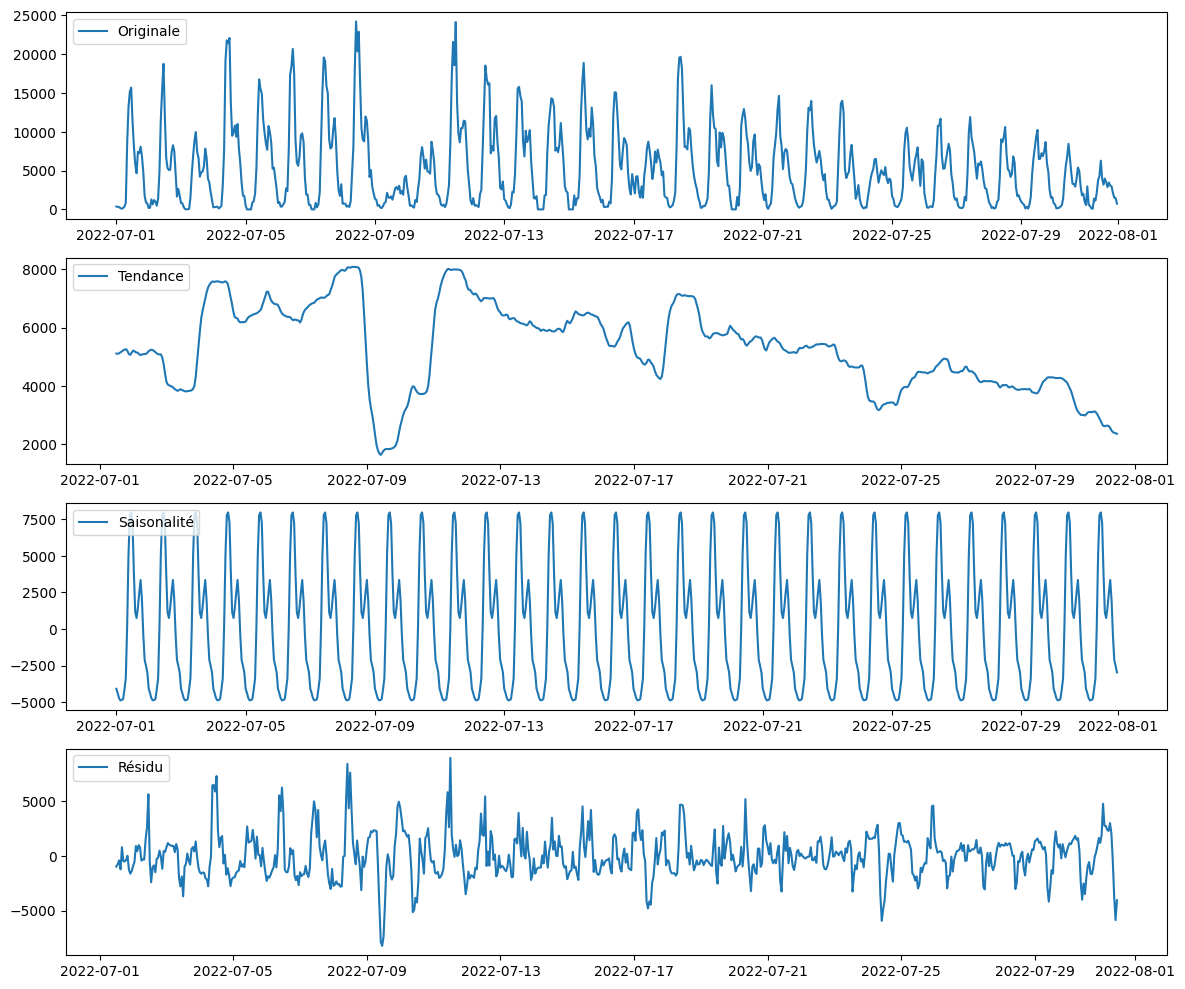

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Décomposition
decomposition = seasonal_decompose(df_hourly['total_rechage'], model="additive", period=24)  # Corriger 'total_rechage' en 'total_recharge'
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Taille du graphique
plt.figure(figsize=(12, 10))  # Ajustez figsize selon vos préférences

# Graphique original
plt.subplot(411)
plt.plot(df_hourly['date_hour'], df_hourly['total_rechage'], label='Originale')  # Corriger 'total_rechage' en 'total_recharge'
plt.legend(loc='upper left')

# Graphique tendance
plt.subplot(412)
plt.plot(df_hourly['date_hour'], trend, label='Tendance')
plt.legend(loc='upper left')

# Graphique saisonnalité
plt.subplot(413)
plt.plot(df_hourly['date_hour'], seasonal, label='Saisonalité')
plt.legend(loc='upper left')

# Graphique résidus
plt.subplot(414)
plt.plot(df_hourly['date_hour'], residual, label='Résidu')
plt.legend(loc='upper left')

# Ajustement des espaces
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Application du test ADF
result = adfuller(df_hourly['total_rechage'].dropna())  # Assurez-vous qu'il n'y a pas de valeurs NaN

# Extraction des résultats
print("Statistique ADF : {:.4f}".format(result[0]))
print("P-valeur : {:.4f}".format(result[1]))
print("Valeurs critiques :")
for key, value in result[4].items():
    print(f"  {key}: {value:.4f}")

# Interprétation
if result[1] <= 0.05:
    print("\nLa série est stationnaire (on rejette l'hypothèse nulle).")
else:
    print("\nLa série n'est pas stationnaire (on ne peut pas rejeter l'hypothèse nulle).")


Statistique ADF : -3.1892
P-valeur : 0.0206
Valeurs critiques :
  1%: -3.4394
  5%: -2.8655
  10%: -2.5689

La série est stationnaire (on rejette l'hypothèse nulle).


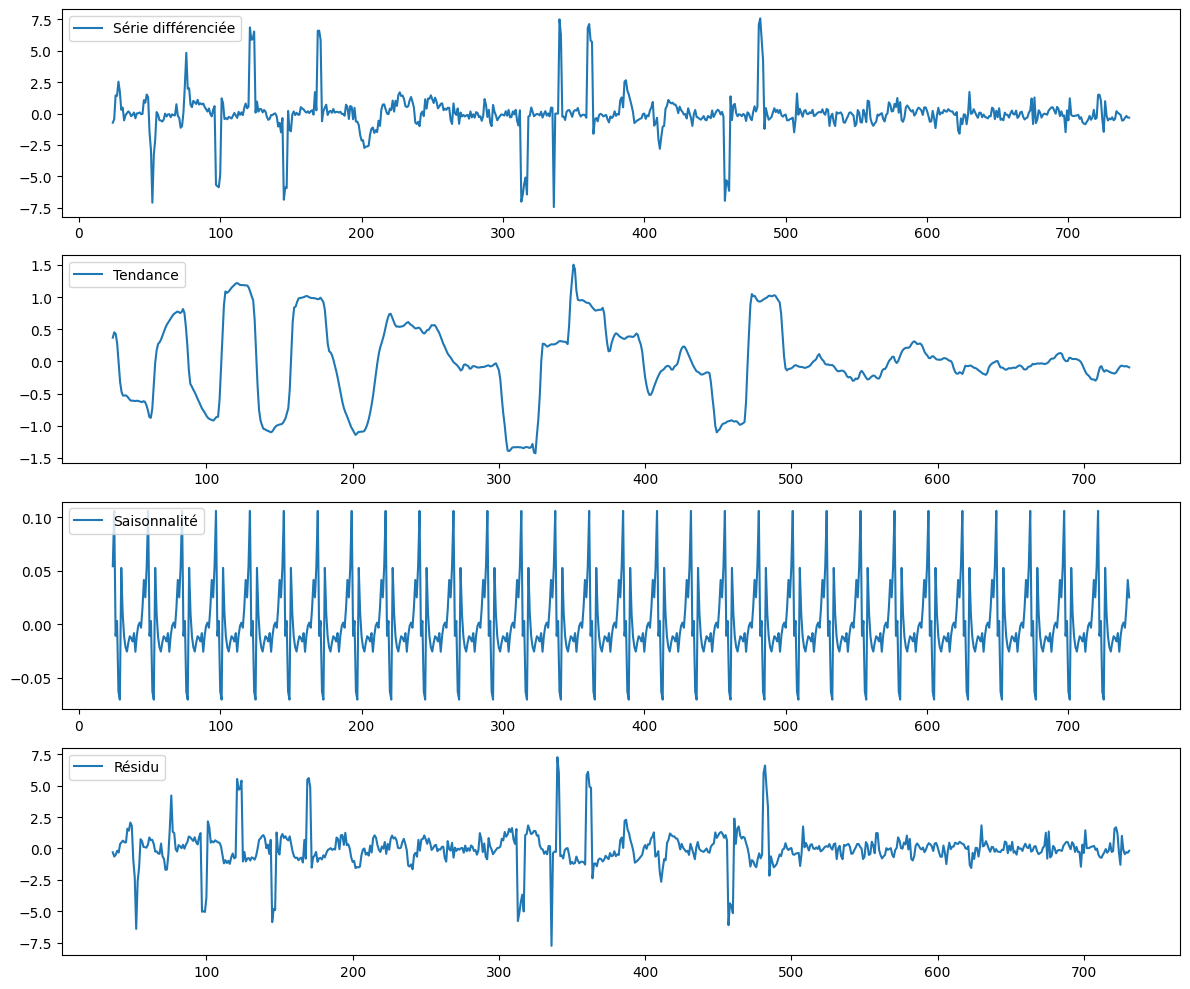

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Supposons que vous avez déjà effectué la transformation et la différenciation
# Si ce n'est pas encore fait :
series = df_hourly['total_rechage']
log_series = np.log(series + 1)
seasonal_diff = log_series - log_series.shift(24)
seasonal_diff.dropna(inplace=True)

# Décomposition de la série transformée
result = seasonal_decompose(seasonal_diff, model='additive', period=24)

# Affichage des composantes
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(seasonal_diff, label='Série différenciée')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Tendance')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Saisonnalité')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Résidu')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


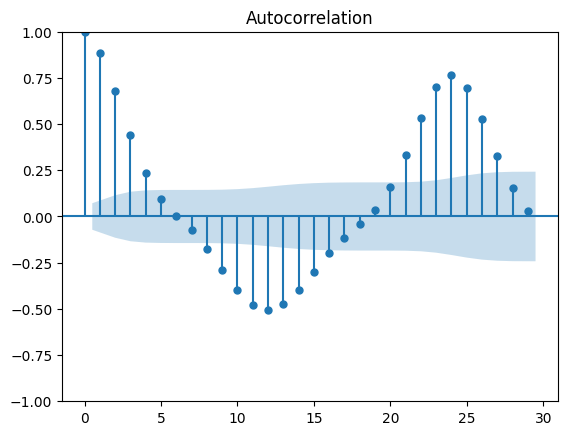

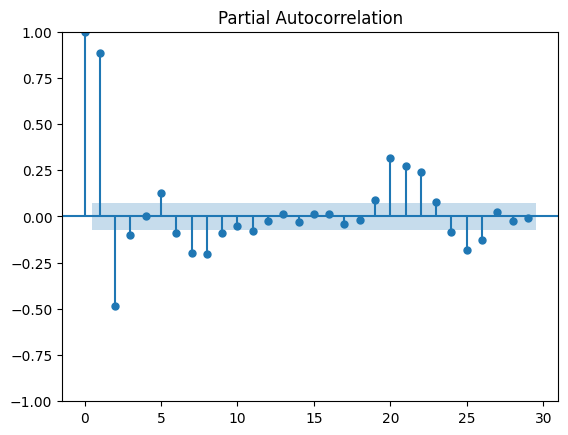

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF et PACF
plot_acf(df_hourly['total_rechage'])
plot_pacf(df_hourly['total_rechage'])
plt.show()


                                     SARIMAX Results                                      
Dep. Variable:                      total_rechage   No. Observations:                  744
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood               -6281.890
Date:                            Sun, 26 Jan 2025   AIC                          12573.780
Time:                                    15:42:06   BIC                          12596.663
Sample:                                         0   HQIC                         12582.615
                                            - 744                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8693      0.013     66.915      0.000       0.844       0.895
ma.L1         -0.0795      0.029   

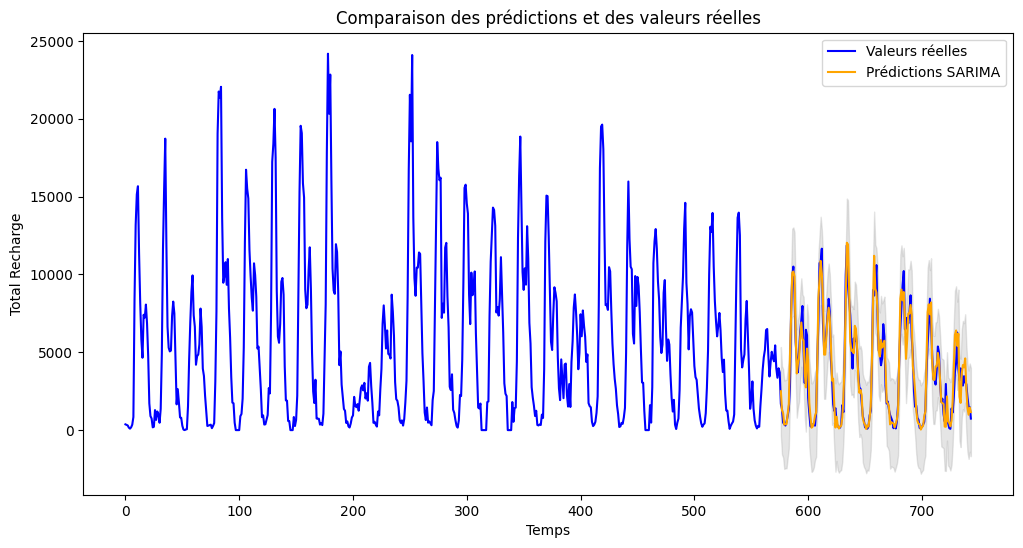

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Définir les paramètres du modèle SARIMA
order = (1, 0, 1)
seasonal_order = (1, 0, 1, 24)

# Ajuster le modèle SARIMA
model = SARIMAX(df_hourly['total_rechage'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_result = model.fit(disp=False)

# Résumé des résultats
print(sarima_result.summary())

# Effectuer des prédictions
start = len(df_hourly) - 24*7  # Prédictions pour la dernière semaine
end = len(df_hourly) - 1
predictions = sarima_result.get_prediction(start=start, end=end)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Visualisation des prédictions
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['total_rechage'], label='Valeurs réelles', color='blue')
plt.plot(predicted_mean.index, predicted_mean, label='Prédictions SARIMA', color='orange')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='gray', alpha=0.2)
plt.legend()
plt.title('Comparaison des prédictions et des valeurs réelles')
plt.xlabel('Temps')
plt.ylabel('Total Recharge')
plt.show()


Mean Absolute Error (MAE): 695.46
Mean Squared Error (MSE): 958675.78
Root Mean Squared Error (RMSE): 979.12


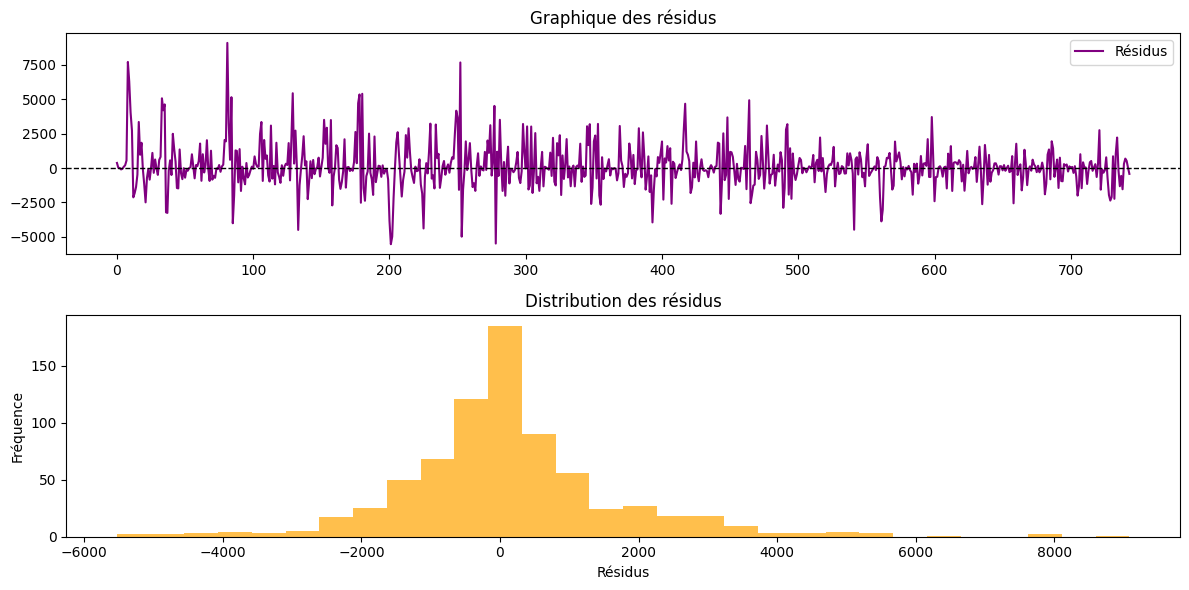

<Figure size 1000x500 with 0 Axes>

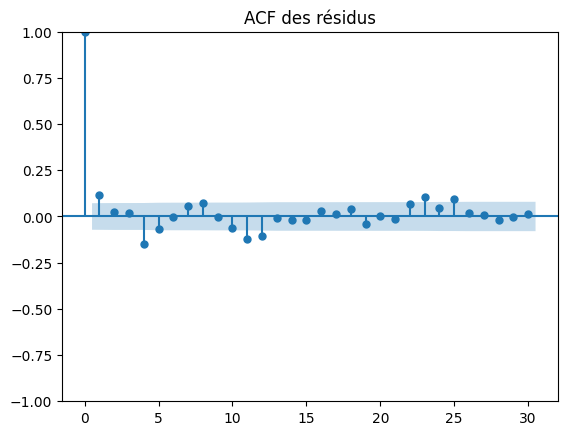

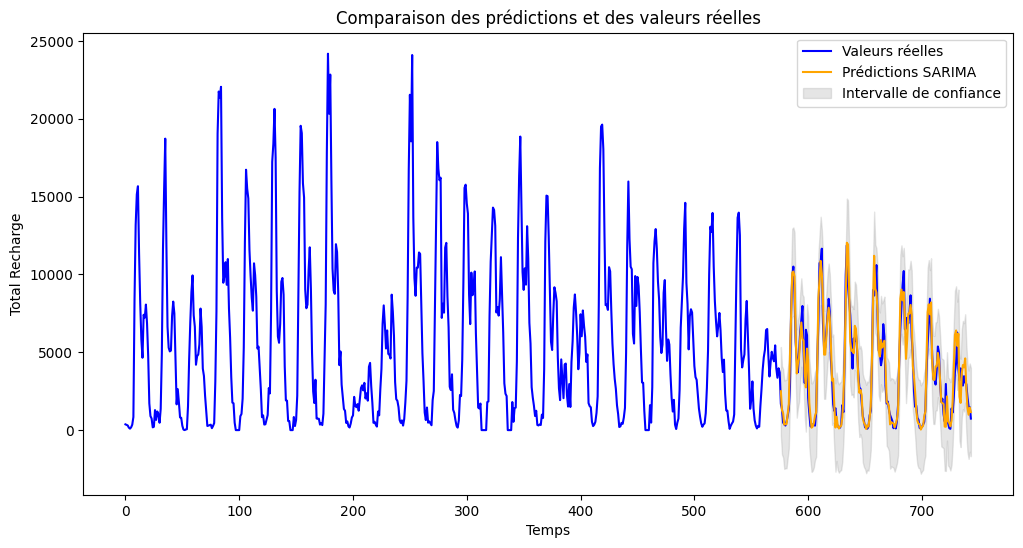

Le modèle SARIMA a été enregistré sous le nom 'sarima_model.pkl'.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Étape 1 : Évaluer les performances du modèle avec des métriques
# Prédictions in-sample pour évaluer les performances
y_true = df_hourly['total_rechage'][start:end + 1]
mae = mean_absolute_error(y_true, predicted_mean)
mse = mean_squared_error(y_true, predicted_mean)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Étape 2 : Visualisation des résidus
residuals = sarima_result.resid

plt.figure(figsize=(12, 6))

# Graphique des résidus
plt.subplot(211)
plt.plot(residuals, label='Résidus', color='purple')
plt.axhline(0, linestyle='--', color='black', linewidth=1)
plt.title('Graphique des résidus')
plt.legend()

# Histogramme des résidus
plt.subplot(212)
plt.hist(residuals, bins=30, color='orange', alpha=0.7)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Étape 3 : Vérification des résidus avec ACF (autocorrélation)
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=30, title="ACF des résidus")
plt.show()

# Étape 4 : Analyse des prédictions et comparaison avec les données réelles
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['total_rechage'], label='Valeurs réelles', color='blue')
plt.plot(predicted_mean.index, predicted_mean, label='Prédictions SARIMA', color='orange')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='gray', alpha=0.2, label='Intervalle de confiance')
plt.legend()
plt.title('Comparaison des prédictions et des valeurs réelles')
plt.xlabel('Temps')
plt.ylabel('Total Recharge')
plt.show()

# Étape 5 : Enregistrer le modèle pour une utilisation future (optionnel)
import pickle

with open('sarima_model.pkl', 'wb') as file:
    pickle.dump(sarima_result, file)

print("Le modèle SARIMA a été enregistré sous le nom 'sarima_model.pkl'.")


In [ ]:
print("Moyenne des valeurs réelles :", df_hourly['total_rechage'].mean())
print("Médiane des valeurs réelles :", df_hourly['total_rechage'].median())


Moyenne des valeurs réelles : 5250.975778945632
Médiane des valeurs réelles : 4156.23750589788


# **Transformation logarithmique **

In [ ]:
df_hourly['log_total_rechage'] = np.log1p(df_hourly['total_rechage'])


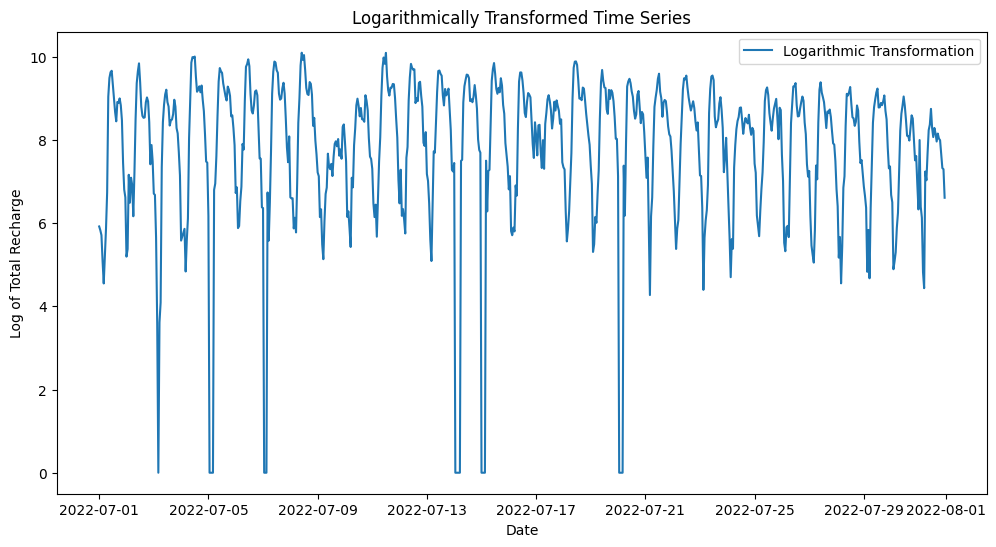

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_hourly['date_hour'], df_hourly['log_total_rechage'], label='Logarithmic Transformation')
plt.title('Logarithmically Transformed Time Series')
plt.xlabel('Date')
plt.ylabel('Log of Total Recharge')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_hourly['log_total_rechage'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] <= 0.05:
    print("La série est stationnaire.")
else:
    print("La série n'est pas stationnaire.")


ADF Statistic: -5.555516699147446
p-value: 1.5842360451759868e-06
Critical Values: {'1%': -3.4394269973845657, '5%': -2.8655458544300387, '10%': -2.568903174551249}
La série est stationnaire.


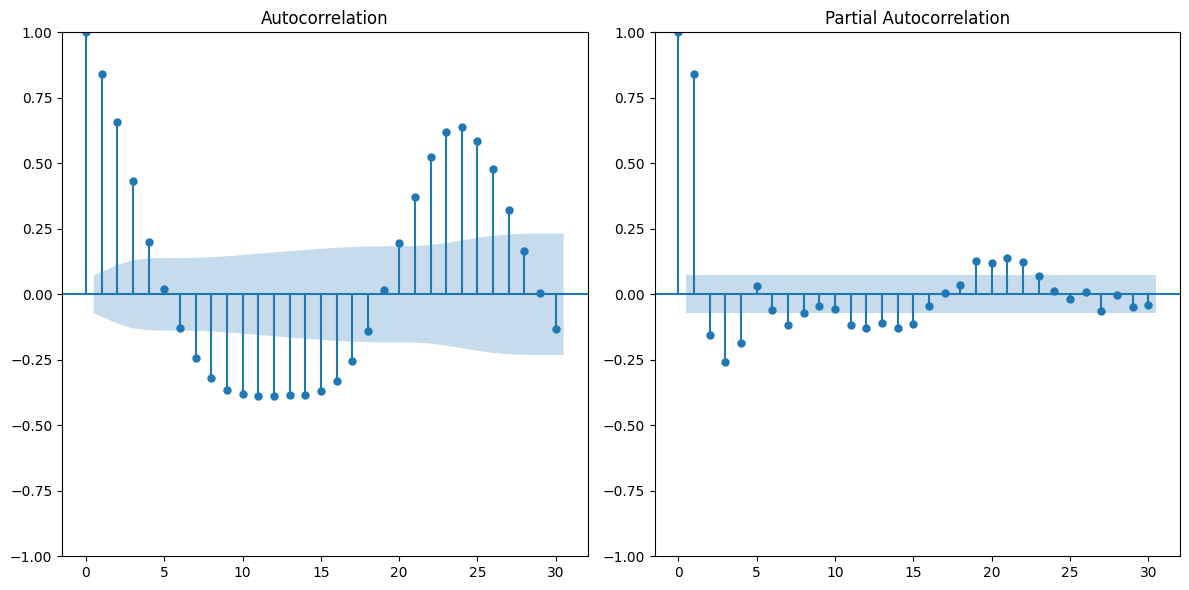

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assurez-vous que les données nulles sont supprimées après la différenciation
plt.figure(figsize=(12, 6))
plot_acf(df_hourly['log_total_rechage'].dropna(), lags=30, ax=plt.subplot(121))
plot_pacf(df_hourly['log_total_rechage'].dropna(), lags=30, ax=plt.subplot(122))
plt.tight_layout()
plt.show()


# DIFF

In [ ]:
# Différenciation de première ordre
df_diff = df_hourly['log_total_rechage'] .diff()

In [ ]:
df_diff.head()

,log_total_rechage
0,NaN
1,-0.090761
2,-0.118704
3,-0.624265
4,-0.535905


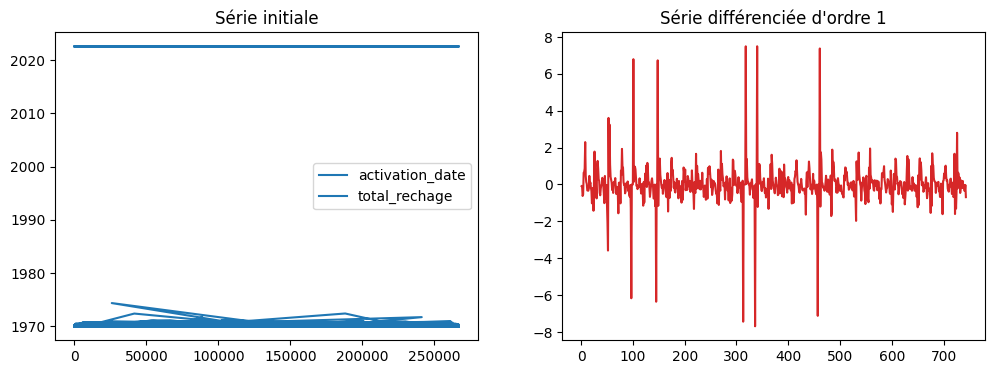

In [ ]:
# Différenciation de première ordre et suppression des valeurs manquantes résultantes

df_diff = df_hourly['log_total_rechage'].diff().dropna()


# Création de sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Tracé de la série initiale et différenciée
df1.plot(title="Série initiale",color="tab:blue", ax=ax1)

df_diff.plot(title="Série différenciée d'ordre 1", color="tab:red", ax=ax2)

plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Définir les paramètres du modèle
p, d, q = 1, 0, 1  # Ajuster selon ACF/PACF
P, D, Q, s = 1, 0, 1, 12  # Ajuster selon la saisonnalité (s=24 pour saisonnalité quotidienne)

# Ajuster le modèle
model = SARIMAX(df_hourly['log_total_rechage'].dropna(),
                order=(p, d, q),
                seasonal_order=(P, D, Q, s))
results = model.fit()

# Résumé des résultats
print(results.summary())

# Prévision
df_hourly['log_predictions'] = results.fittedvalues


                                     SARIMAX Results                                      
Dep. Variable:                  log_total_rechage   No. Observations:                  744
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1040.390
Date:                            Sun, 26 Jan 2025   AIC                           2090.781
Time:                                    15:42:28   BIC                           2113.841
Sample:                                         0   HQIC                          2099.670
                                            - 744                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8694      0.014     63.329      0.000       0.842       0.896
ma.L1          0.0246      0.034   

In [ ]:
# Prédictions sur les données
df_hourly['log_predictions'] = results.fittedvalues

# Inversion de la transformation logarithmique
df_hourly['predictions'] = np.expm1(df_hourly['log_predictions'])  # Retour à l'échelle originale


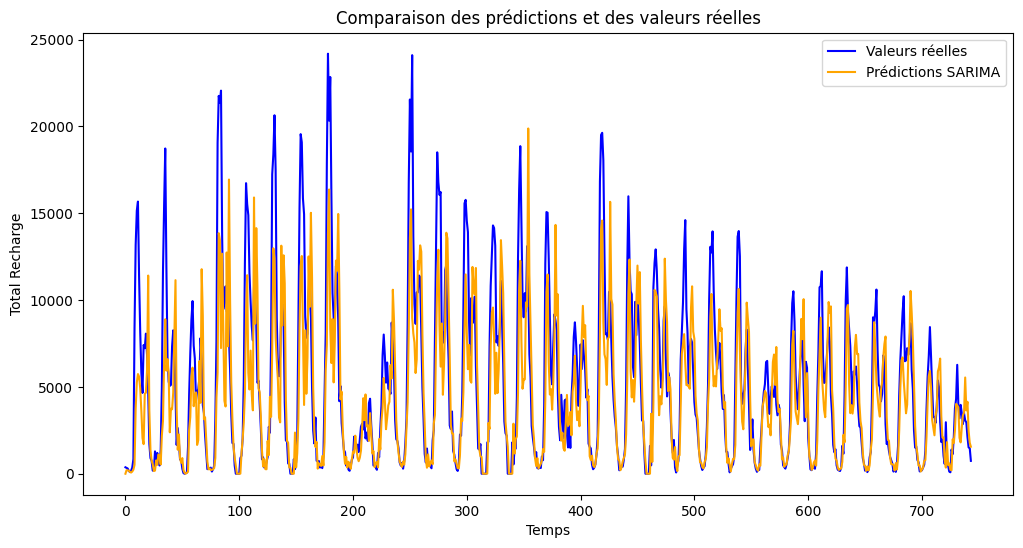

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_hourly['total_rechage'], label='Valeurs réelles', color='blue')
plt.plot(df_hourly['predictions'], label='Prédictions SARIMA', color='orange')
plt.legend()
plt.title("Comparaison des prédictions et des valeurs réelles")
plt.xlabel("Temps")
plt.ylabel("Total Recharge")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcul des métriques
mae = mean_absolute_error(df_hourly['total_rechage'], df_hourly['predictions'])
mse = mean_squared_error(df_hourly['total_rechage'], df_hourly['predictions'])
rmse = np.sqrt(mse)

# Affichage
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 2127.58
Mean Squared Error (MSE): 10461662.03
Root Mean Squared Error (RMSE): 3234.45


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Normalisation
scaler = MinMaxScaler()
df_hourly['total_rechage_scaled'] = scaler.fit_transform(df_hourly[['total_rechage']])

# SARIMAX sur les données normalisées
model = SARIMAX(df_hourly['total_rechage_scaled'],
                order=(1, 0, 1),
                seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Prévisions
forecast = results.get_forecast(steps=30)
forecast_values = forecast.predicted_mean

# Rétablir l'échelle originale
forecast_original_scale = scaler.inverse_transform(forecast_values.values.reshape(-1, 1))

# Afficher les prévisions
print(forecast_original_scale)


[[ 518.88619933]
 [1763.86876463]
 [2112.37814875]
 [2141.95339127]
 [1931.62311913]
 [1556.68030872]
 [1425.37389941]
 [2078.74428695]
 [4202.95276773]
 [6291.14652114]
 [7046.06258047]
 [7543.60149105]
 [7650.15129286]
 [6339.99063232]
 [5921.10755696]
 [5819.72828603]
 [5957.33437195]
 [6259.11867757]
 [6319.49226337]
 [5600.94187591]
 [3421.78101081]
 [1279.0175674 ]
 [ 461.43820407]
 [ -99.83779433]
 [-272.07636393]
 [ 963.74077874]
 [1314.69074715]
 [1350.79543869]
 [1150.05534289]
 [ 786.78391985]]


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajuster un modèle avec différents paramètres
model = SARIMAX(df_hourly['total_rechage_scaled'],
                order=(2, 1, 2),  # p, d, q
                seasonal_order=(1, 1, 1, 12))  # P, D, Q, s
results = model.fit()

# Vérifier les résidus
residuals = results.resid
print("Moyenne des résidus :", residuals.mean())
print("Variance des résidus :", residuals.var())

# Prévisions
forecast = results.get_forecast(steps=30)
forecast_values = forecast.predicted_mean

# Rétablir l'échelle originale
forecast_original_scale = scaler.inverse_transform(forecast_values.values.reshape(-1, 1))

# Corriger les valeurs négatives
forecast_original_scale = [max(0, val[0]) for val in forecast_original_scale]

# Afficher les prévisions corrigées
print(forecast_original_scale)


Moyenne des résidus : -0.0026188170748601015
Variance des résidus : 0.005856940662546038
[1276.3991257747002, 0, 0, 0, 0, 0, 1307.1045313363588, 1141.442493426709, 2347.248112869825, 4319.1376660872065, 5667.603151934171, 6188.814782391761, 4633.096581360151, 3192.015249529099, 2535.2171147541217, 2047.143468371755, 1793.400450663715, 2150.7656217788704, 2399.5645618081107, 2122.6421004760236, 2018.6501975880751, 2395.1960038596153, 2872.1776967722312, 2621.3844664892595, 2273.052532712278, 821.6508751823592, 0, 0, 0, 350.7228332168143]


In [ ]:
forecast_corrected = [max(0, val) for val in forecast_original_scale]


In [ ]:
model = SARIMAX(df_hourly['total_rechage_scaled'],
                order=(2, 1, 2),  # p, d, q
                seasonal_order=(2, 1, 1, 12))  # P, D, Q, s


In [ ]:
model = SARIMAX(
    df_hourly['total_rechage'],
    order=(1, 1, 1),               # Paramètres p, d, q
    seasonal_order=(1, 1, 1, 7)    # Paramètres P, D, Q, s
)


In [ ]:
forecast_corrected = [max(0, val) for val in forecast.predicted_mean]


In [ ]:
# Prédictions sur les données hors-échantillon
model_fit = SARIMAX(
    df_hourly['total_rechage'],
    order=auto_model.order,
    seasonal_order=auto_model.seasonal_order,
).fit()
n_steps = 30  # Ajustez selon la période de prévision souhaitée
forecast = model_fit.get_forecast(steps=n_steps)

# Moyenne prédite et intervalle de confiance
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


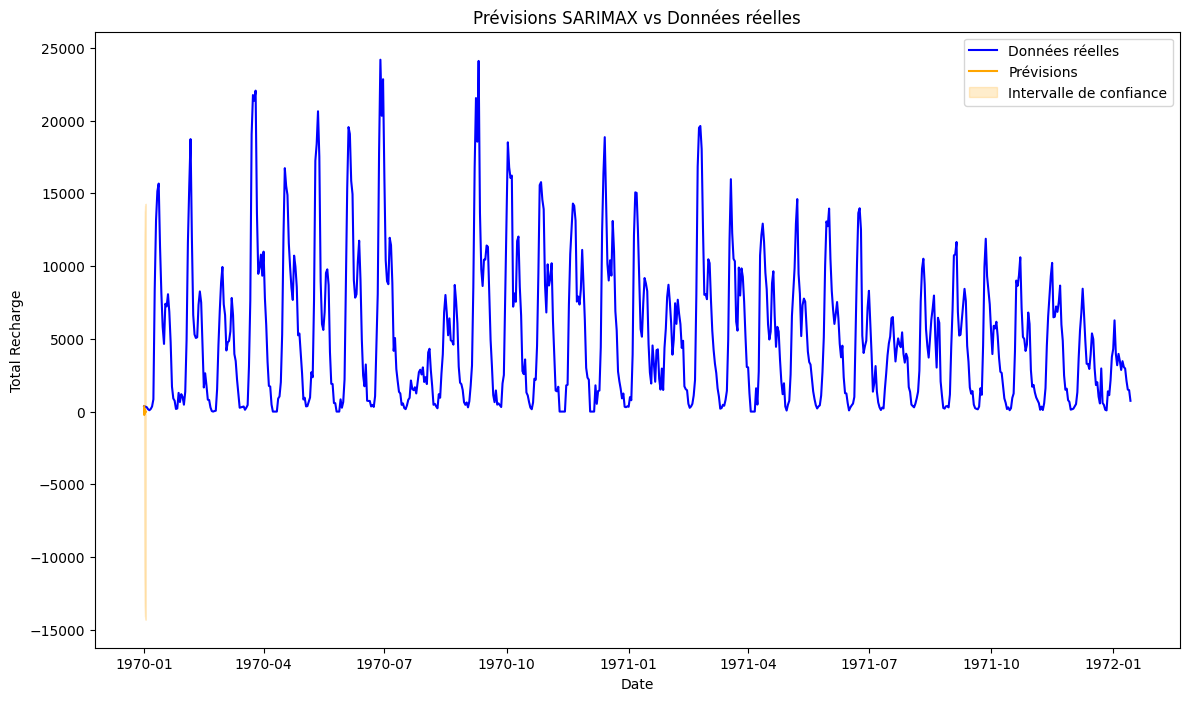

In [ ]:
import matplotlib.pyplot as plt

# Préparation de l'index pour les prévisions
forecast_index = pd.date_range(start=df_hourly.index[-1], periods=n_steps+1, freq='H')[1:]

# Tracer les données réelles
plt.figure(figsize=(14, 8))
plt.plot(df_hourly.index, df_hourly['total_rechage'], label='Données réelles', color='blue')

# Tracer les prévisions
plt.plot(forecast_index, forecast_mean, label='Prévisions', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2, label='Intervalle de confiance')

# Ajout des détails
plt.legend()
plt.title('Prévisions SARIMAX vs Données réelles')
plt.xlabel('Date')
plt.ylabel('Total Recharge')
plt.show()
